<a href="https://colab.research.google.com/github/shrish83/Python-Basics/blob/master/RGEnterpriseTask.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Intraday Stock Task

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [ ]:
df = pd.read_excel('/content/BankNiftyFutures_Data5Min.xlsx')
df.head()

,Ticker,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
0,BANKNIFTY_F1,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
1,BANKNIFTY_F1,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2,BANKNIFTY_F1,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
3,BANKNIFTY_F1,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
4,BANKNIFTY_F1,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91737 entries, 0 to 91736
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Ticker             91737 non-null  object        
 1   Date               91737 non-null  datetime64[ns]
 2   Final Date format  91737 non-null  int64         
 3   Time               91737 non-null  object        
 4   Open 5             91737 non-null  float64       
 5   High 5             91737 non-null  float64       
 6   Low 5              91737 non-null  float64       
 7   Close 5            91737 non-null  float64       
 8   Volume 5           91737 non-null  int64         
 9   Year               91737 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(2)
memory usage: 7.0+ MB


In [ ]:
df.shape

(91737, 10)

In [ ]:
df.describe()

,Final Date format,Open 5,High 5,Low 5,Close 5,Volume 5,Year
count,9.173700e+04,91737.000000,91737.000000,91737.000000,91737.000000,9.173700e+04,91737.000000
mean,2.017057e+07,22852.481723,22868.809964,22836.145490,22852.631275,5.531416e+04,2016.990952
std,1.413046e+04,4816.167946,4818.059589,4814.411349,4816.300957,6.066659e+04,1.412742
min,2.015010e+07,13449.900400,13559.900400,13406.400400,13445.000000,0.000000e+00,2015.000000
25%,2.016033e+07,18506.000000,18522.250000,18490.099600,18506.150400,1.916000e+04,2016.000000
50%,2.017063e+07,23525.800800,23533.199200,23518.000000,23526.599600,3.565000e+04,2017.000000
75%,2.018092e+07,26805.050800,26820.650400,26786.150400,26805.000000,6.888000e+04,2018.000000
max,2.019123e+07,32755.000000,32773.851600,32745.000000,32756.849600,1.580480e+06,2019.000000


In [ ]:
##Remove  Ticker from data
df.drop('Ticker',axis=1,inplace=True)

In [ ]:
df.index = df['Date'] 
df_copy = df.copy()
df.drop('Date',axis=1,inplace=True)

In [ ]:
df.head()

,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
Date,,,,,,,,
2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


## Backtest

In [ ]:
!pip install fastquant

Starting Portfolio Value: 100000.00
2019-12-31, ===Global level arguments===
2019-12-31, init_cash : 100000
2019-12-31, buy_prop : 1
2019-12-31, sell_prop : 1
2019-12-31, commission : 0.0075
2019-12-31, stop_loss : 0
2019-12-31, stop_trail : 0
===Strategy level arguments===
fast_period : 15
slow_period : 40
2019-12-31, Final Portfolio Value: 100000.0
2019-12-31, Final PnL: 0.0
Time used (seconds): 36.72487998008728
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:15	slow_period:40
Returns	rtot:0.0	ravg:0.0	rnorm:0.0	rnorm100:0.0
Sharpe	sharperatio:None
Drawdown	len:0	drawdown:0.0	moneydown:0.0	max:AutoOrderedDict([('len', 0.0), ('drawdown', 0.0),

posx and posy should be finite values
posx and posy should be finite values


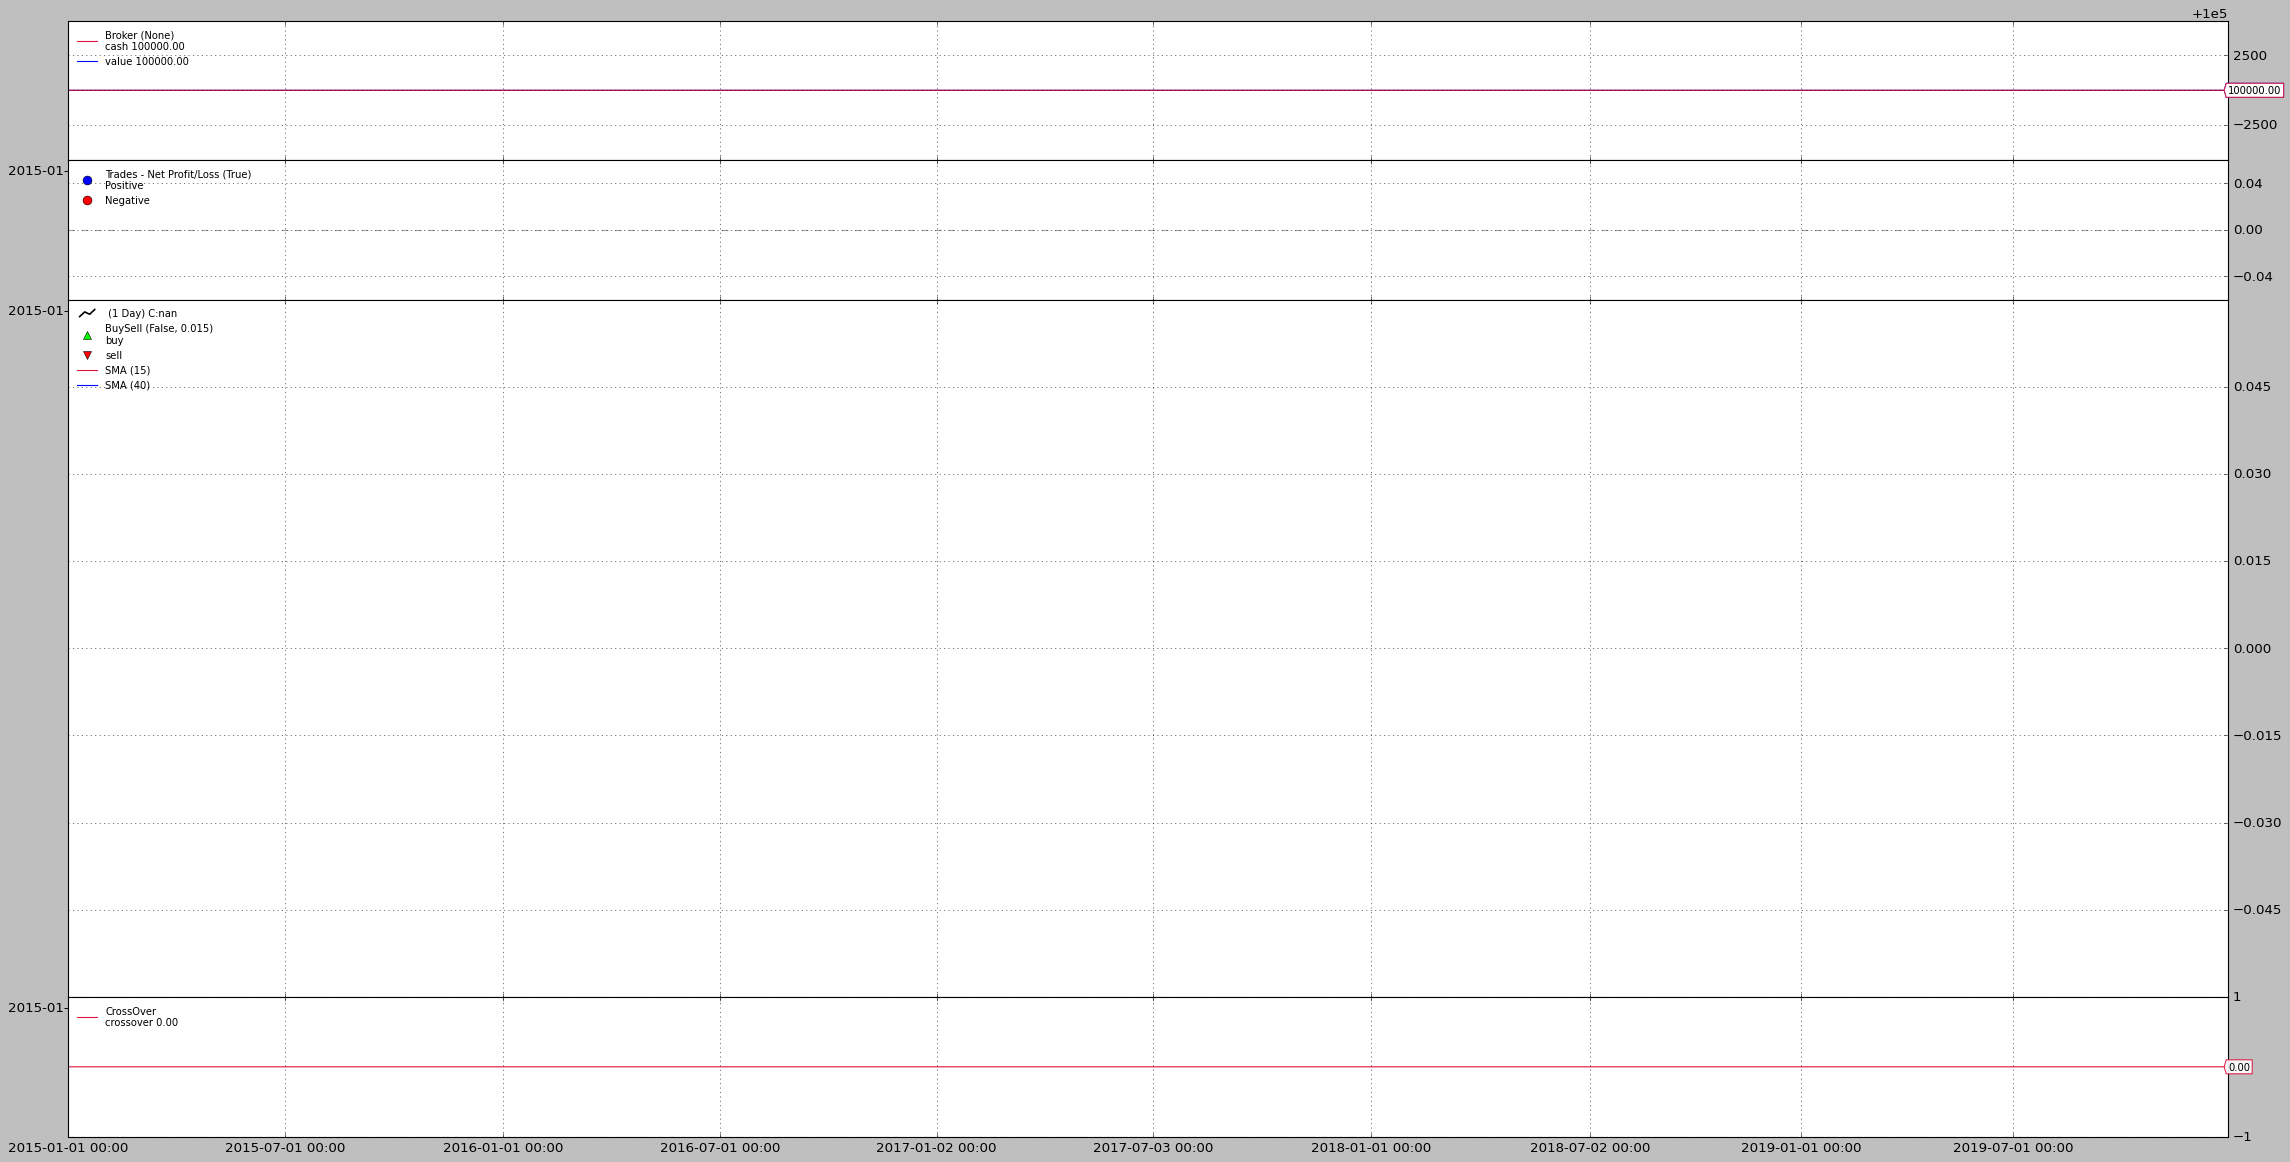

,strat_id,init_cash,buy_prop,sell_prop,commission,stop_loss,stop_trail,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value
0,0,100000,1,1,0.0075,0,0,close,,,False,1.5,0,M,15,40,0.0,0.0,0.0,0.0,0,0.0,0.0,"{'len': 0.0, 'drawdown': 0.0, 'moneydown': 0.0}",0.0,0,None,0.0,100000.0


In [ ]:
from fastquant import backtest
df1 = pd.DataFrame(df['Close 5'])
backtest('smac', df1,fast_period=15, slow_period=40)

Starting Portfolio Value: 100000.00
2019-12-31, ===Global level arguments===
2019-12-31, init_cash : 100000
2019-12-31, buy_prop : 1
2019-12-31, sell_prop : 1
2019-12-31, commission : 0.0075
2019-12-31, stop_loss : 0
2019-12-31, stop_trail : 0
===Strategy level arguments===
fast_period : 30
slow_period : 50
2019-12-31, Final Portfolio Value: 100000.0
2019-12-31, Final PnL: 0.0
Time used (seconds): 36.51496362686157
Number of strat runs: 1
Number of strats per run: 1
Strat names: ['smac']
**************************************************
--------------------------------------------------
Strategy Parameters	init_cash:100000	buy_prop:1	sell_prop:1	commission:0.0075	stop_loss:0	stop_trail:0	execution_type:close	channel:	symbol:	allow_short:False	short_max:1.5	add_cash_amount:0	add_cash_freq:M	fast_period:30	slow_period:50
Returns	rtot:0.0	ravg:0.0	rnorm:0.0	rnorm100:0.0
Sharpe	sharperatio:None
Drawdown	len:0	drawdown:0.0	moneydown:0.0	max:AutoOrderedDict([('len', 0.0), ('drawdown', 0.0),

posx and posy should be finite values
posx and posy should be finite values


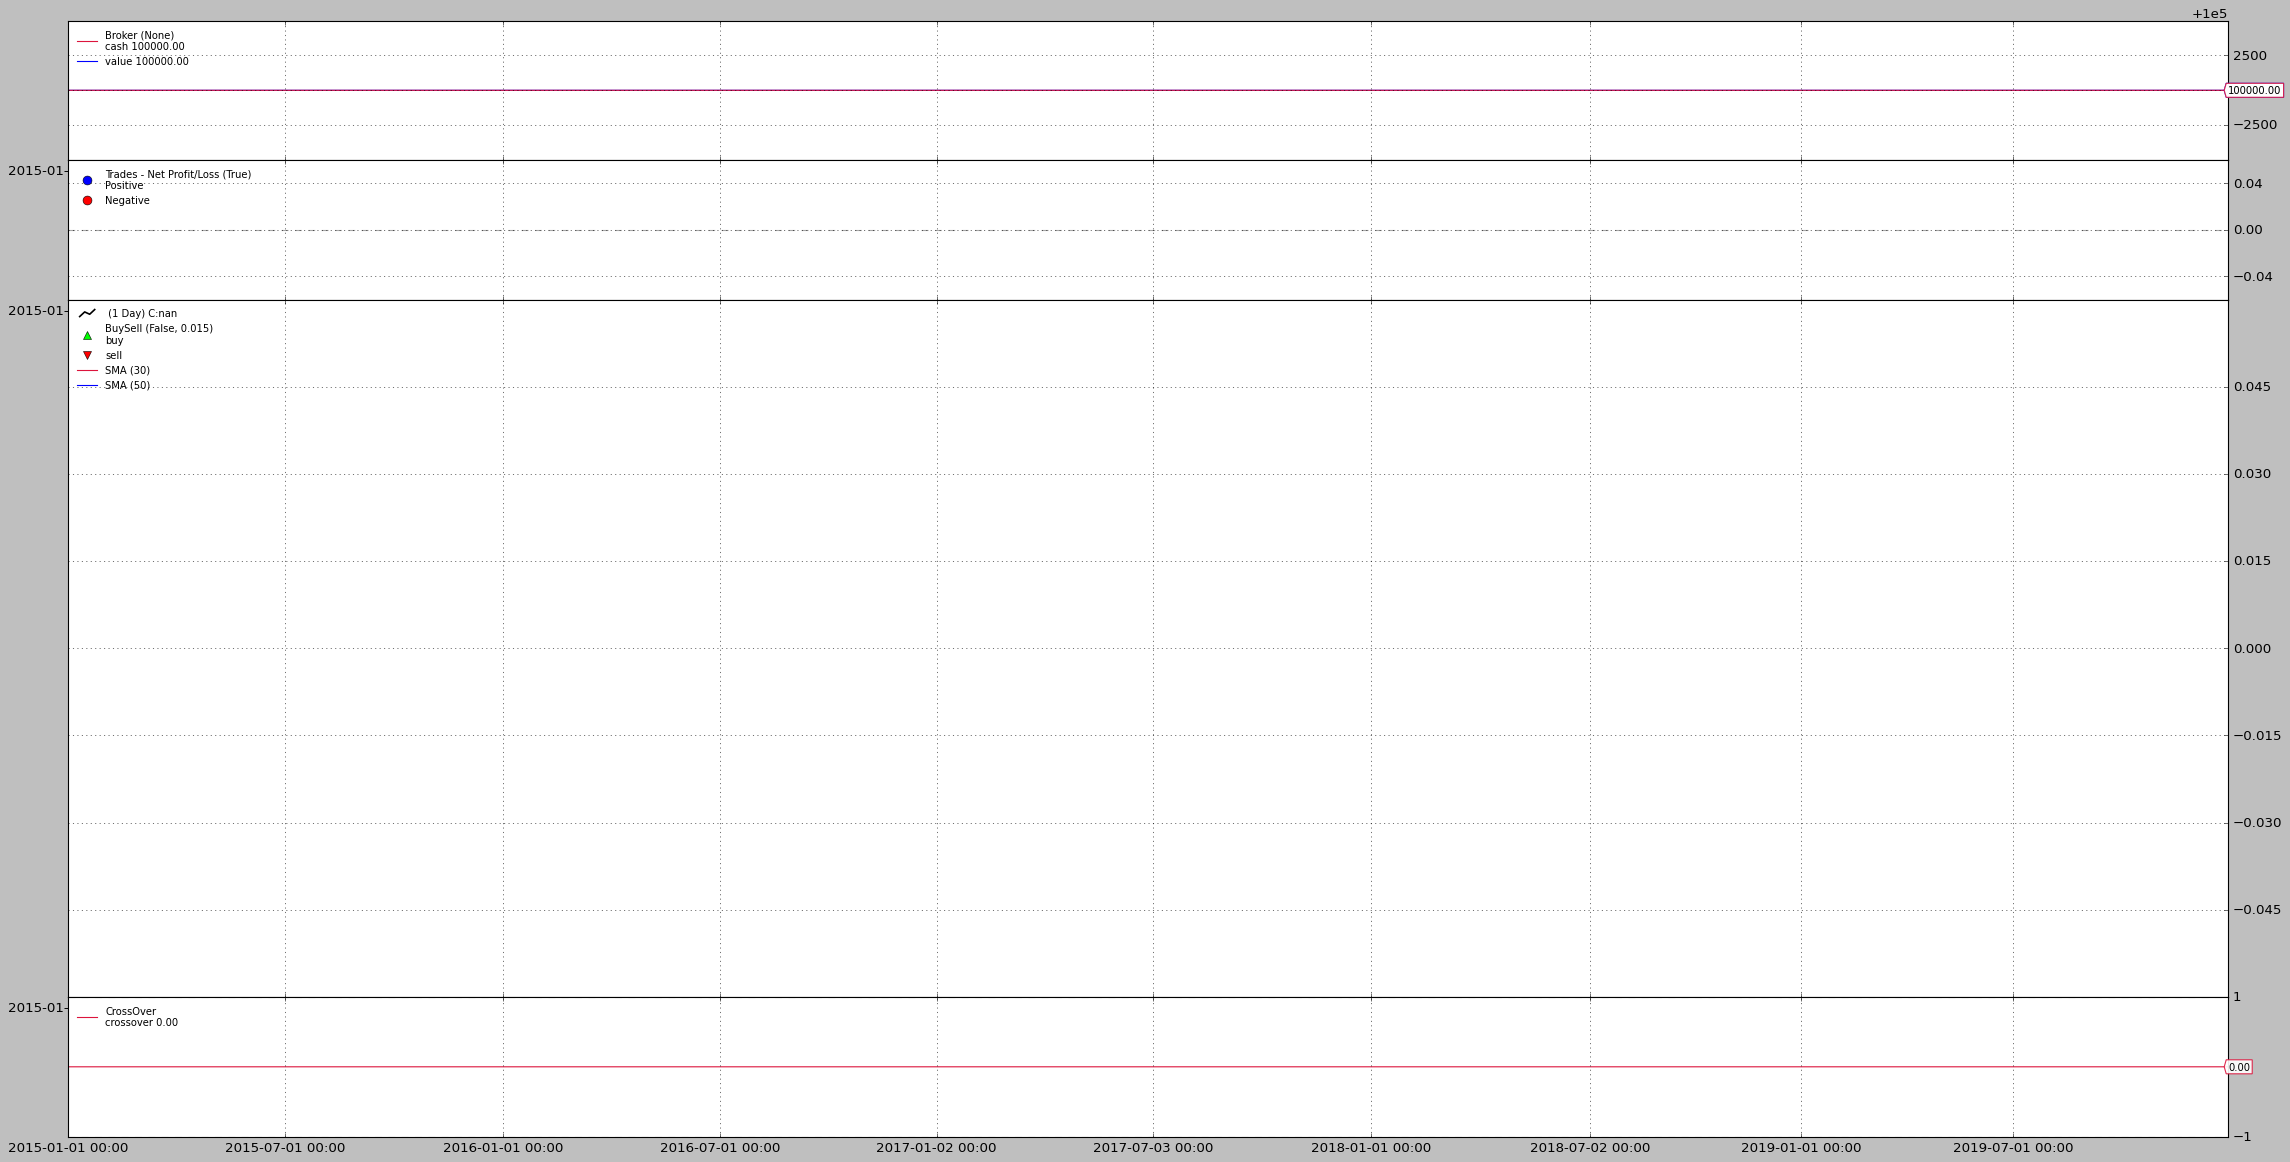

,strat_id,init_cash,buy_prop,sell_prop,commission,stop_loss,stop_trail,execution_type,channel,symbol,allow_short,short_max,add_cash_amount,add_cash_freq,fast_period,slow_period,rtot,ravg,rnorm,rnorm100,len,drawdown,moneydown,max,maxdrawdown,maxdrawdownperiod,sharperatio,pnl,final_value
0,0,100000,1,1,0.0075,0,0,close,,,False,1.5,0,M,30,50,0.0,0.0,0.0,0.0,0,0.0,0.0,"{'len': 0.0, 'drawdown': 0.0, 'moneydown': 0.0}",0.0,0,None,0.0,100000.0


In [ ]:
##Improving SMAC Strategy
backtest('smac', df1,fast_period=30, slow_period=50)

## Analysis

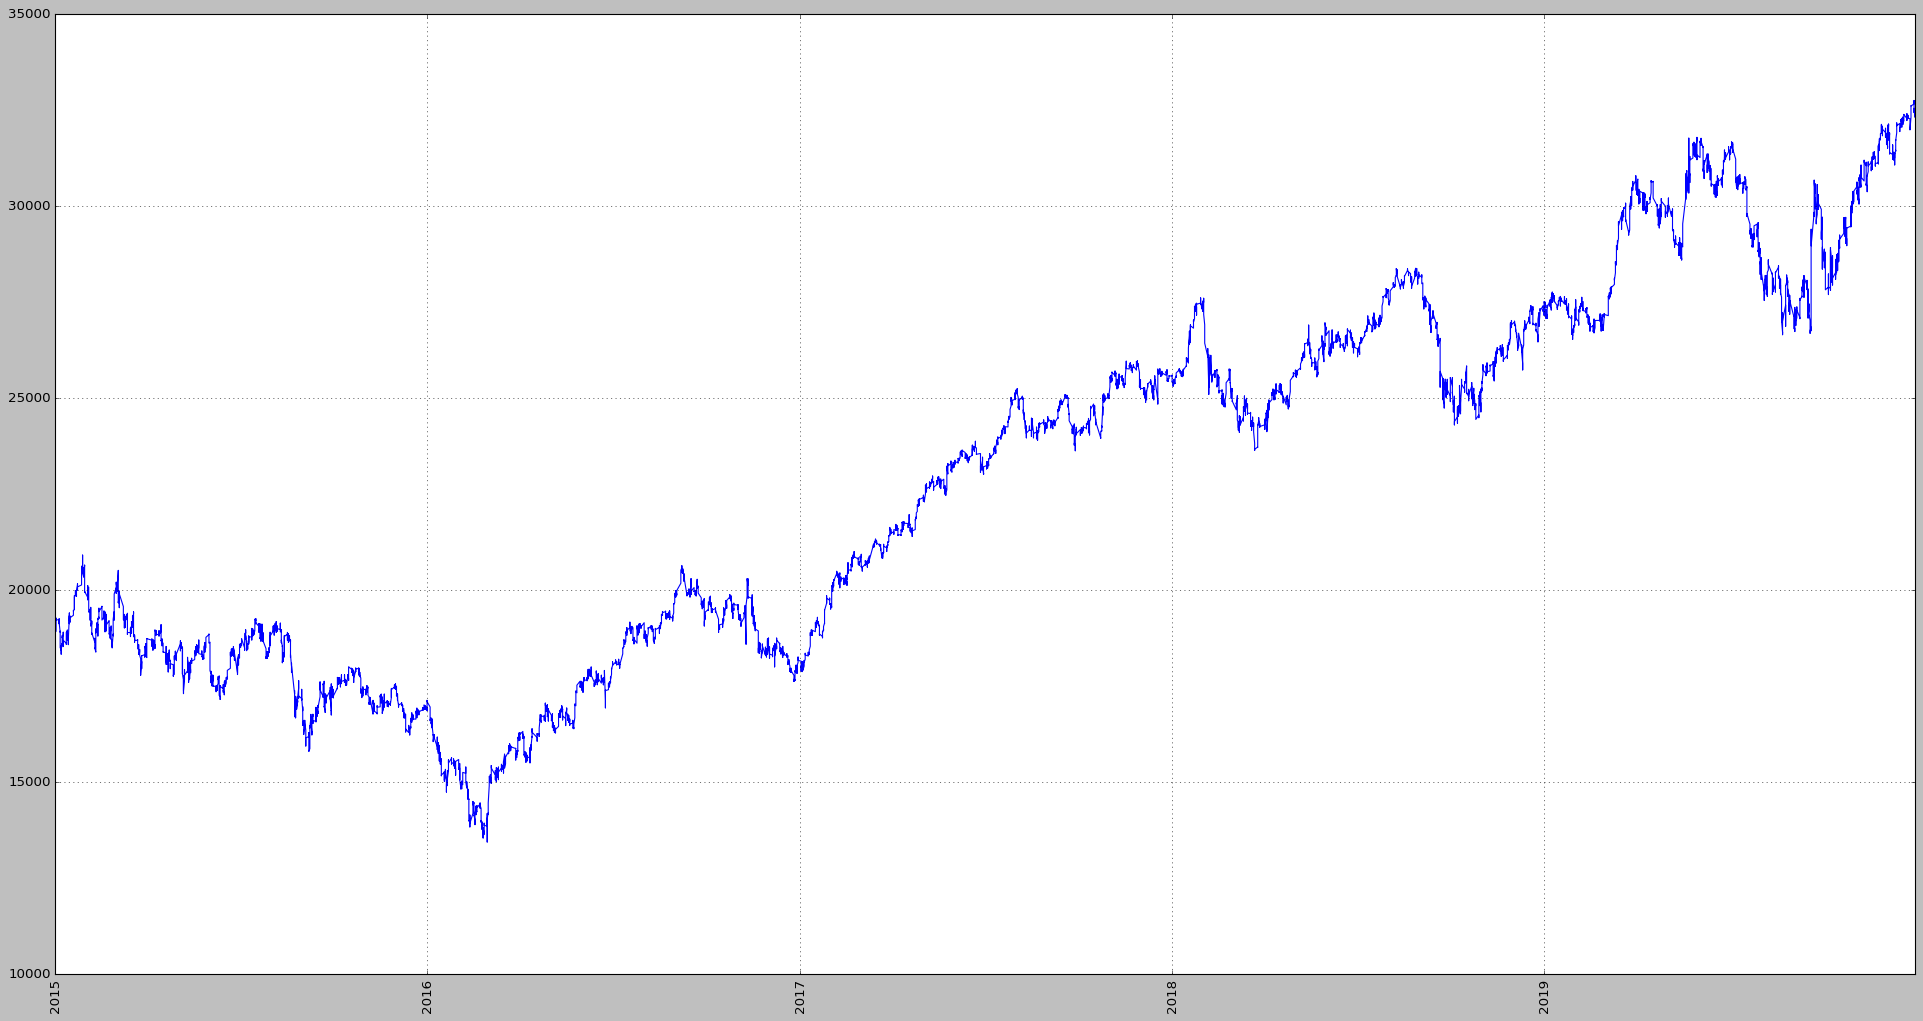

In [ ]:
import matplotlib.dates as md

plt.plot(df.index, df['Close 5'])
plt.gca().xaxis.set_major_formatter(md.DateFormatter('%Y'))
plt.gca().xaxis.set_major_locator(md.YearLocator())
plt.grid(True)
plt.xticks(rotation=90)
plt.show()

## Converting to 15 min time frame

In [ ]:
df_copy.head()

,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year
Date,,,,,,,,,
2015-01-01,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015
2015-01-01,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015
2015-01-01,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015
2015-01-01,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015
2015-01-01,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91737 entries, 2015-01-01 to 2019-12-31
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               91737 non-null  datetime64[ns]
 1   Final Date format  91737 non-null  int64         
 2   Time               91737 non-null  object        
 3   Open 5             91737 non-null  float64       
 4   High 5             91737 non-null  float64       
 5   Low 5              91737 non-null  float64       
 6   Close 5            91737 non-null  float64       
 7   Volume 5           91737 non-null  int64         
 8   Year               91737 non-null  int64         
dtypes: datetime64[ns](1), float64(4), int64(3), object(1)
memory usage: 7.0+ MB


In [ ]:

from datetime import datetime
df_copy['dtime']=df_copy['Date'].dt.strftime('%Y-%m-%d').astype('str') +' '+ df_copy['Time'].astype('str')


In [ ]:
df_copy.head()

,Date,Final Date format,Time,Open 5,High 5,Low 5,Close 5,Volume 5,Year,dtime
Date,,,,,,,,,,
2015-01-01,2015-01-01,20150101,09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015,2015-01-01 09:20:00
2015-01-01,2015-01-01,20150101,09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015,2015-01-01 09:25:00
2015-01-01,2015-01-01,20150101,09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015,2015-01-01 09:30:00
2015-01-01,2015-01-01,20150101,09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015,2015-01-01 09:35:00
2015-01-01,2015-01-01,20150101,09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015,2015-01-01 09:40:00


In [ ]:
df_new = df_copy.copy()

In [ ]:
df_new.drop(['Date','Final Date format','Time'],axis=1,inplace=True)
df_new.index = df_new['dtime']
df_new.head()

,Open 5,High 5,Low 5,Close 5,Volume 5,Year,dtime
dtime,,,,,,,
2015-01-01 09:20:00,18861.3496,18867.9492,18793.0000,18808.3496,84825,2015,2015-01-01 09:20:00
2015-01-01 09:25:00,18808.0000,18835.0000,18802.1992,18829.0000,40925,2015,2015-01-01 09:25:00
2015-01-01 09:30:00,18826.9492,18833.4004,18820.0000,18826.0996,27000,2015,2015-01-01 09:30:00
2015-01-01 09:35:00,18825.0508,18829.0996,18810.0000,18810.0000,18025,2015,2015-01-01 09:35:00
2015-01-01 09:40:00,18805.0000,18808.9492,18775.0000,18803.9492,60100,2015,2015-01-01 09:40:00


In [ ]:
df_new.drop('Year',axis=1,inplace=True)

In [ ]:
df_new.index = pd.to_datetime(df_new.index)
df_new = df_new.resample('15Min').sum()

In [ ]:

df_new.head()

,Open 5,High 5,Low 5,Close 5,Volume 5
dtime,,,,,
2015-01-01 09:15:00,37669.3496,37702.9492,37595.1992,37637.3496,125750
2015-01-01 09:30:00,56457.0000,56471.4492,56405.0000,56440.0488,105125
2015-01-01 09:45:00,56461.9492,56518.9512,56450.5508,56504.8008,79575
2015-01-01 10:00:00,56533.9512,56560.8008,56510.3516,56542.7500,47300
2015-01-01 10:15:00,56524.4004,56547.0000,56499.1504,56517.6504,27800


In [ ]:
df_new.shape

(175225, 5)

## VWAP

In [ ]:
def calculateVwap(data): 

    data['TP'] = (data['High 5']+data['Low 5']+data['Close 5'])/3.0 

    data['TradedValue']  = data['TP']*data['Volume 5'] 

    data['CumVolume'] = data['Volume 5'].cumsum() 

    data['CumTradedValue'] = data['TradedValue'].cumsum() 

    data['VWAP'] = data['CumTradedValue'] /data['CumVolume'] 

    return data 

In [ ]:
dt = df_new.index.date

In [ ]:
dt

array([datetime.date(2015, 1, 1), datetime.date(2015, 1, 1),
       datetime.date(2015, 1, 1), ..., datetime.date(2019, 12, 31),
       datetime.date(2019, 12, 31), datetime.date(2019, 12, 31)],
      dtype=object)

In [ ]:
df2 = df_new.groupby(dt).apply(calculateVwap) 

In [ ]:
df2.head(10)

,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
dtime,,,,,,,,,,
2015-01-01 09:15:00,37669.3496,37702.9492,37595.1992,37637.3496,125750,37645.166000,4.733880e+09,125750,4.733880e+09,37645.166000
2015-01-01 09:30:00,56457.0000,56471.4492,56405.0000,56440.0488,105125,56438.832667,5.933132e+09,230875,1.066701e+10,46202.542105
2015-01-01 09:45:00,56461.9492,56518.9512,56450.5508,56504.8008,79575,56491.434267,4.495306e+09,310450,1.516232e+10,48839.806057
2015-01-01 10:00:00,56533.9512,56560.8008,56510.3516,56542.7500,47300,56537.967467,2.674246e+09,357750,1.783656e+10,49857.620270
2015-01-01 10:15:00,56524.4004,56547.0000,56499.1504,56517.6504,27800,56521.266933,1.571291e+09,385550,1.940785e+10,50338.101082
2015-01-01 10:30:00,56504.2500,56519.9004,56480.5996,56497.9492,14150,56499.483067,7.994677e+08,399700,2.020732e+10,50556.223562
2015-01-01 10:45:00,56500.3496,56524.8008,56492.2988,56512.1992,13325,56509.766267,7.529926e+08,413025,2.096032e+10,50748.296576
2015-01-01 11:00:00,56534.5000,56541.7500,56508.0000,56528.3496,20075,56526.033200,1.134760e+09,433100,2.209508e+10,51016.105541
2015-01-01 11:15:00,56552.1992,56613.3008,56539.4004,56580.1992,86025,56577.633467,4.867091e+09,519125,2.696217e+10,51937.714864


## Day wise VWAP vs Close

In [ ]:
df3 = df2.resample('1D').mean()

In [ ]:
df3.head()

,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
dtime,,,,,,,,,,
2015-01-01,23658.245729,23668.529661,23648.494210,23659.083851,18220.762712,23658.702574,9.908933e+08,8.733445e+05,4.703570e+10,53172.623819
2015-01-02,14984.260946,14995.870279,14976.833312,14987.621825,27973.437500,14986.775139,1.607553e+09,1.348218e+06,7.742913e+10,57391.585931
2015-01-03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2015-01-04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,NaN
2015-01-05,14985.616762,14994.142129,14975.477600,14984.363504,22401.302083,14984.661078,1.289100e+09,1.087361e+06,6.258566e+10,57564.828430


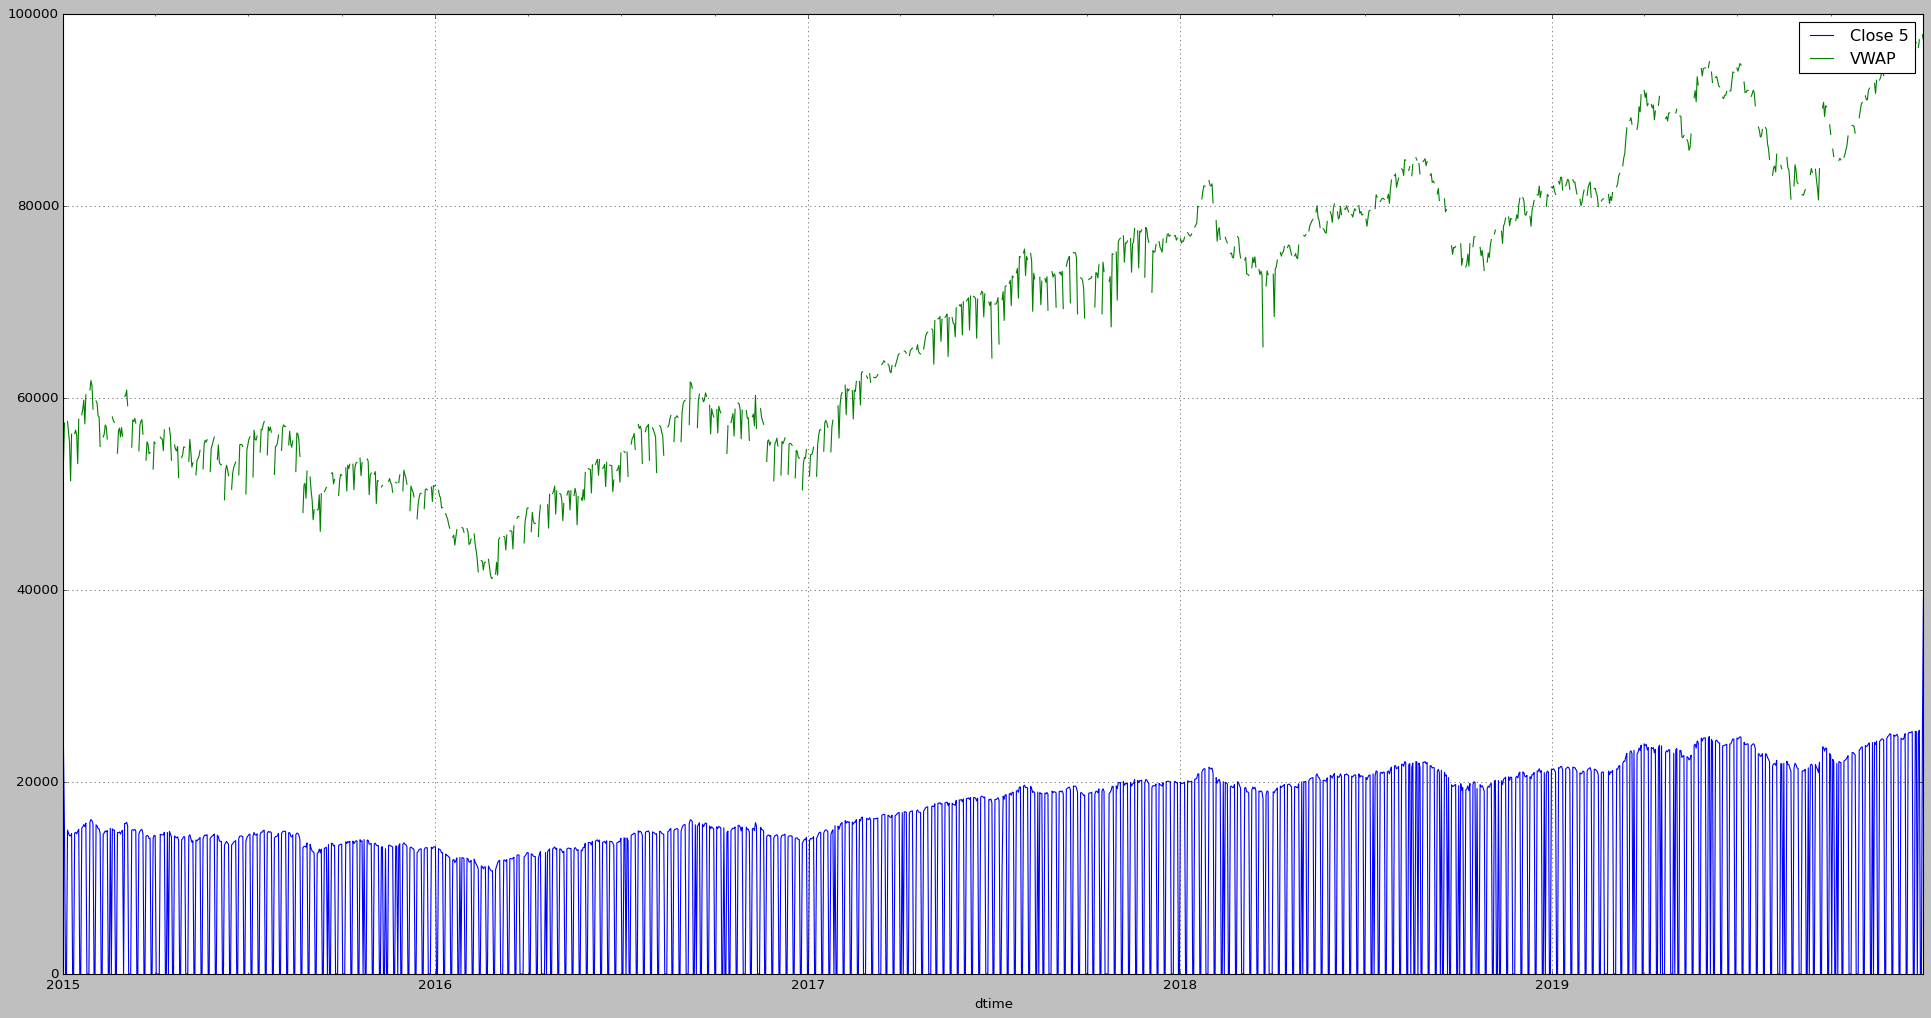

In [ ]:
df3['Close 5'].plot(grid=True)
df3['VWAP'].plot(grid=True)
plt.legend()
plt.show()

## Year Wise WVAP vs Close

In [ ]:
df4 = df2.resample('1Y').mean()

In [ ]:
df4.head()

,Open 5,High 5,Low 5,Close 5,Volume 5,TP,TradedValue,CumVolume,CumTradedValue,VWAP
dtime,,,,,,,,,,
2015-12-31,9581.854041,9590.640897,9572.811575,9581.752816,23699.133560,9581.735096,1.283451e+09,1.116883e+06,6.039302e+10,53930.158840
2016-12-31,9212.843522,9220.280433,9205.374616,9212.849189,22939.926856,9212.834746,1.195471e+09,1.085231e+06,5.648467e+10,52308.820835
2017-12-31,12158.506313,12164.712588,12152.491715,12158.703794,19223.503425,12158.636032,1.332316e+09,9.115482e+05,6.308780e+10,68694.028348
2018-12-31,13625.809896,13634.390886,13617.263268,13625.936700,43286.745434,13625.863618,3.373613e+09,2.039908e+06,1.590882e+11,78263.895757
2019-12-31,15249.944834,15261.682492,15238.247675,15250.107681,35663.540650,15250.012616,3.127514e+09,1.673683e+06,1.468050e+11,88241.937457


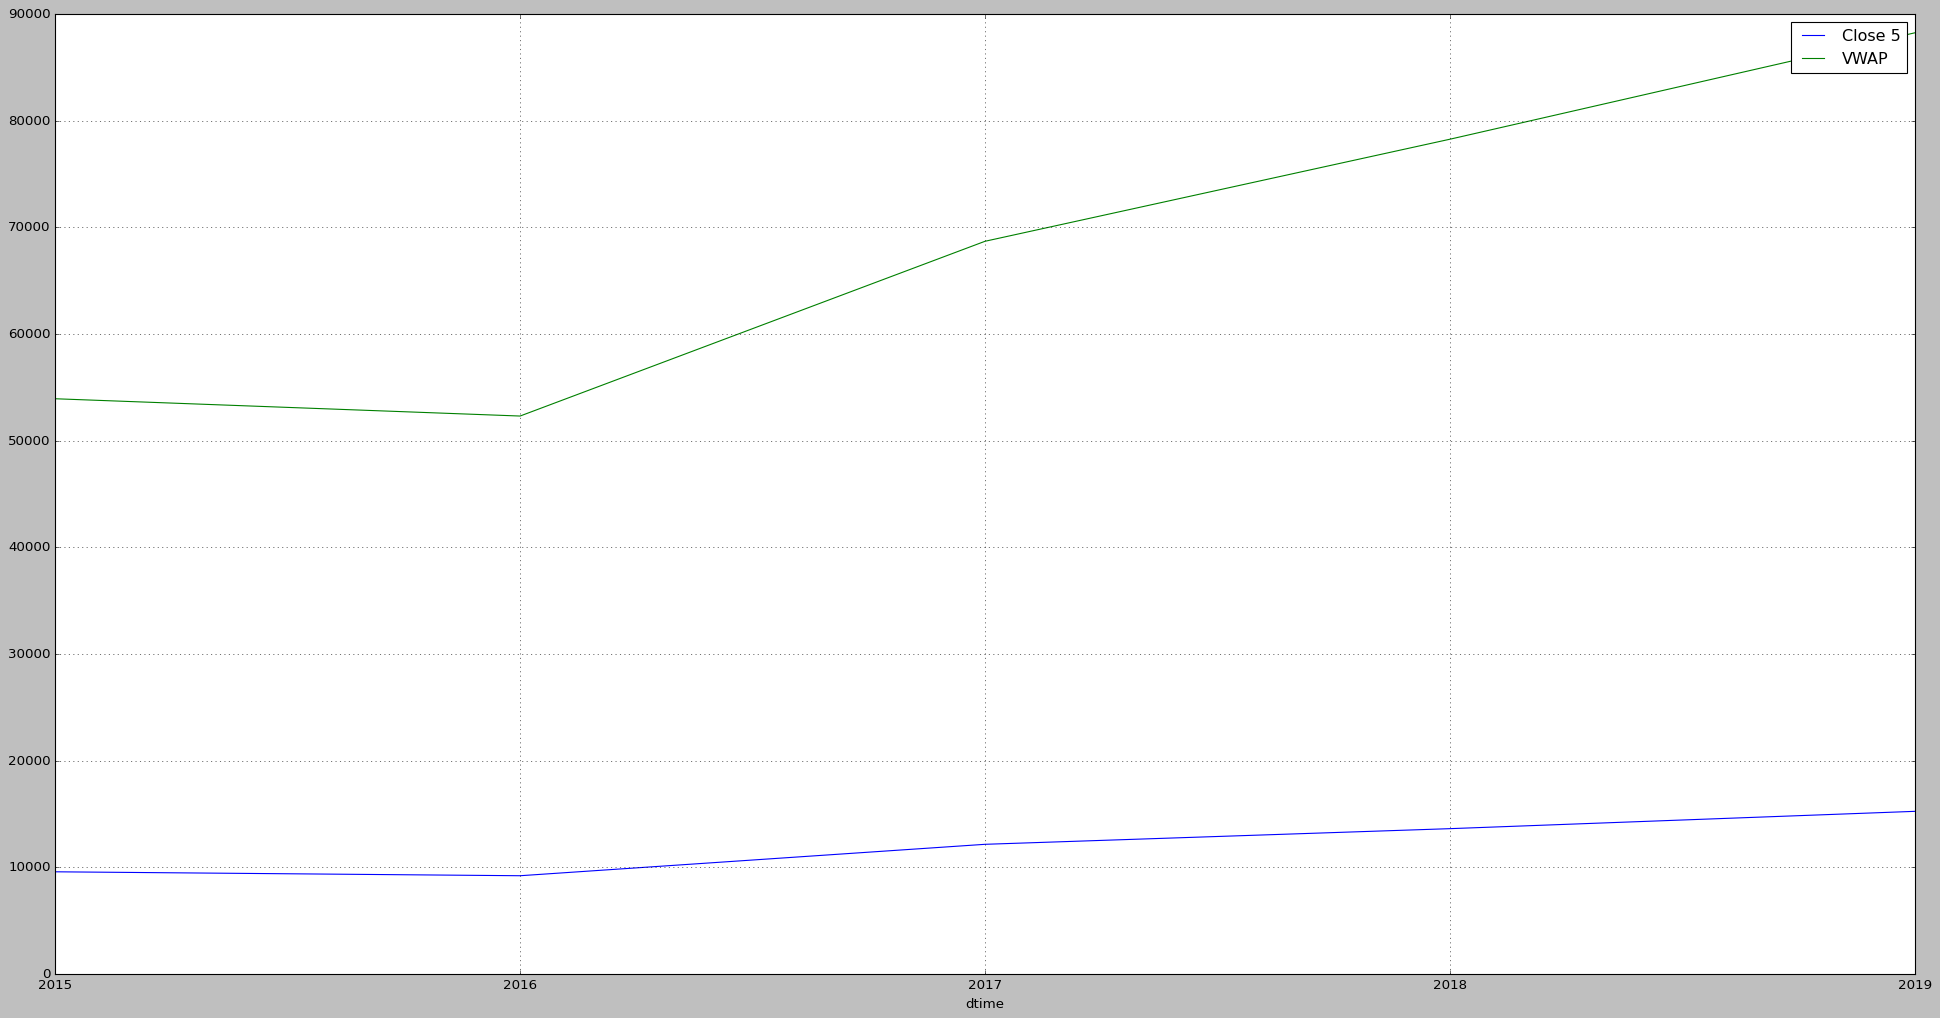

In [ ]:
df4['Close 5'].plot(grid=True)
df4['VWAP'].plot(grid=True)
plt.legend()
plt.show()

##Evaluation

In [ ]:
df3.isnull().sum()

Open 5              0
High 5              0
Low 5               0
Close 5             0
Volume 5            0
TP                  0
TradedValue         0
CumVolume           0
CumTradedValue      0
VWAP              601
dtype: int64

In [ ]:
df3['VWAP'] = df3['VWAP'].fillna(0)

##### Tick Size : 0.01

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 175225 entries, 2015-01-01 09:15:00 to 2019-12-31 15:15:00
Freq: 15T
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Open 5          175225 non-null  float64
 1   High 5          175225 non-null  float64
 2   Low 5           175225 non-null  float64
 3   Close 5         175225 non-null  float64
 4   Volume 5        175225 non-null  int64  
 5   TP              175225 non-null  float64
 6   TradedValue     175225 non-null  float64
 7   CumVolume       175225 non-null  int64  
 8   CumTradedValue  175225 non-null  float64
 9   VWAP            72241 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 14.7 MB


In [ ]:
def cal(d):
  if d['Close 5'] > d['VWAP']:
    d['Buy'] = d['High 5'] + (d['High 5'] * 0.01)
    d['SL'] = d['Low 5'] - (d['Low 5'] * 0.01)
    d['Sell'] = d['Low 5']
  else:
    d['Sell'] = d['Low 5'] + (d['Low 5'] * 0.01)
    d['SL'] = d['High 5'] - (d['High 5'] * 0.01)
    d['Buy'] = d['High 5']
  return d

In [ ]:
df5 = df2.apply(cal,axis=1)

In [ ]:
df5.head()

,Buy,Close 5,CumTradedValue,CumVolume,High 5,Low 5,Open 5,SL,Sell,TP,TradedValue,VWAP,Volume 5
dtime,,,,,,,,,,,,,
2015-01-01 09:15:00,37702.949200,37637.3496,4.733880e+09,125750.0,37702.9492,37595.1992,37669.3496,37325.919708,37971.151192,37645.166000,4.733880e+09,37645.166000,125750.0
2015-01-01 09:30:00,57036.163692,56440.0488,1.066701e+10,230875.0,56471.4492,56405.0000,56457.0000,55840.950000,56405.000000,56438.832667,5.933132e+09,46202.542105,105125.0
2015-01-01 09:45:00,57084.140712,56504.8008,1.516232e+10,310450.0,56518.9512,56450.5508,56461.9492,55886.045292,56450.550800,56491.434267,4.495306e+09,48839.806057,79575.0
2015-01-01 10:00:00,57126.408808,56542.7500,1.783656e+10,357750.0,56560.8008,56510.3516,56533.9512,55945.248084,56510.351600,56537.967467,2.674246e+09,49857.620270,47300.0
2015-01-01 10:15:00,57112.470000,56517.6504,1.940785e+10,385550.0,56547.0000,56499.1504,56524.4004,55934.158896,56499.150400,56521.266933,1.571291e+09,50338.101082,27800.0


In [ ]:
df5.loc[df5['Buy'] > df5['Sell'], 'Loss'] = df5['Buy'] - df5['Sell'] 
df5.loc[df5['Buy'] < df5['Sell'], 'Profit'] = df5['Sell'] - df5['Buy']

In [ ]:
df5.head()

,Buy,Close 5,CumTradedValue,CumVolume,High 5,Low 5,Open 5,SL,Sell,TP,TradedValue,VWAP,Volume 5,Loss,Profit
dtime,,,,,,,,,,,,,,,
2015-01-01 09:15:00,37702.949200,37637.3496,4.733880e+09,125750.0,37702.9492,37595.1992,37669.3496,37325.919708,37971.151192,37645.166000,4.733880e+09,37645.166000,125750.0,NaN,268.201992
2015-01-01 09:30:00,57036.163692,56440.0488,1.066701e+10,230875.0,56471.4492,56405.0000,56457.0000,55840.950000,56405.000000,56438.832667,5.933132e+09,46202.542105,105125.0,631.163692,NaN
2015-01-01 09:45:00,57084.140712,56504.8008,1.516232e+10,310450.0,56518.9512,56450.5508,56461.9492,55886.045292,56450.550800,56491.434267,4.495306e+09,48839.806057,79575.0,633.589912,NaN
2015-01-01 10:00:00,57126.408808,56542.7500,1.783656e+10,357750.0,56560.8008,56510.3516,56533.9512,55945.248084,56510.351600,56537.967467,2.674246e+09,49857.620270,47300.0,616.057208,NaN
2015-01-01 10:15:00,57112.470000,56517.6504,1.940785e+10,385550.0,56547.0000,56499.1504,56524.4004,55934.158896,56499.150400,56521.266933,1.571291e+09,50338.101082,27800.0,613.319600,NaN


In [ ]:
df6 = df5[['Profit','Loss']]

In [ ]:
df6 = df6.fillna(0)
df6.head()

,Profit,Loss
dtime,,
2015-01-01 09:15:00,268.201992,0.000000
2015-01-01 09:30:00,0.000000,631.163692
2015-01-01 09:45:00,0.000000,633.589912
2015-01-01 10:00:00,0.000000,616.057208
2015-01-01 10:15:00,0.000000,613.319600


In [ ]:
fin = df6.groupby(dt).sum()

,Profit,Loss
2015-01-01,268.201992,14661.744608
2015-01-02,0.000000,16223.584268
2015-01-03,0.000000,0.000000
2015-01-04,0.000000,0.000000
2015-01-05,10052.804444,3237.781704


In [ ]:
fin.head()

,Profit,Loss
2015-01-01,268.201992,14661.744608
2015-01-02,0.000000,16223.584268
2015-01-03,0.000000,0.000000
2015-01-04,0.000000,0.000000
2015-01-05,10052.804444,3237.781704


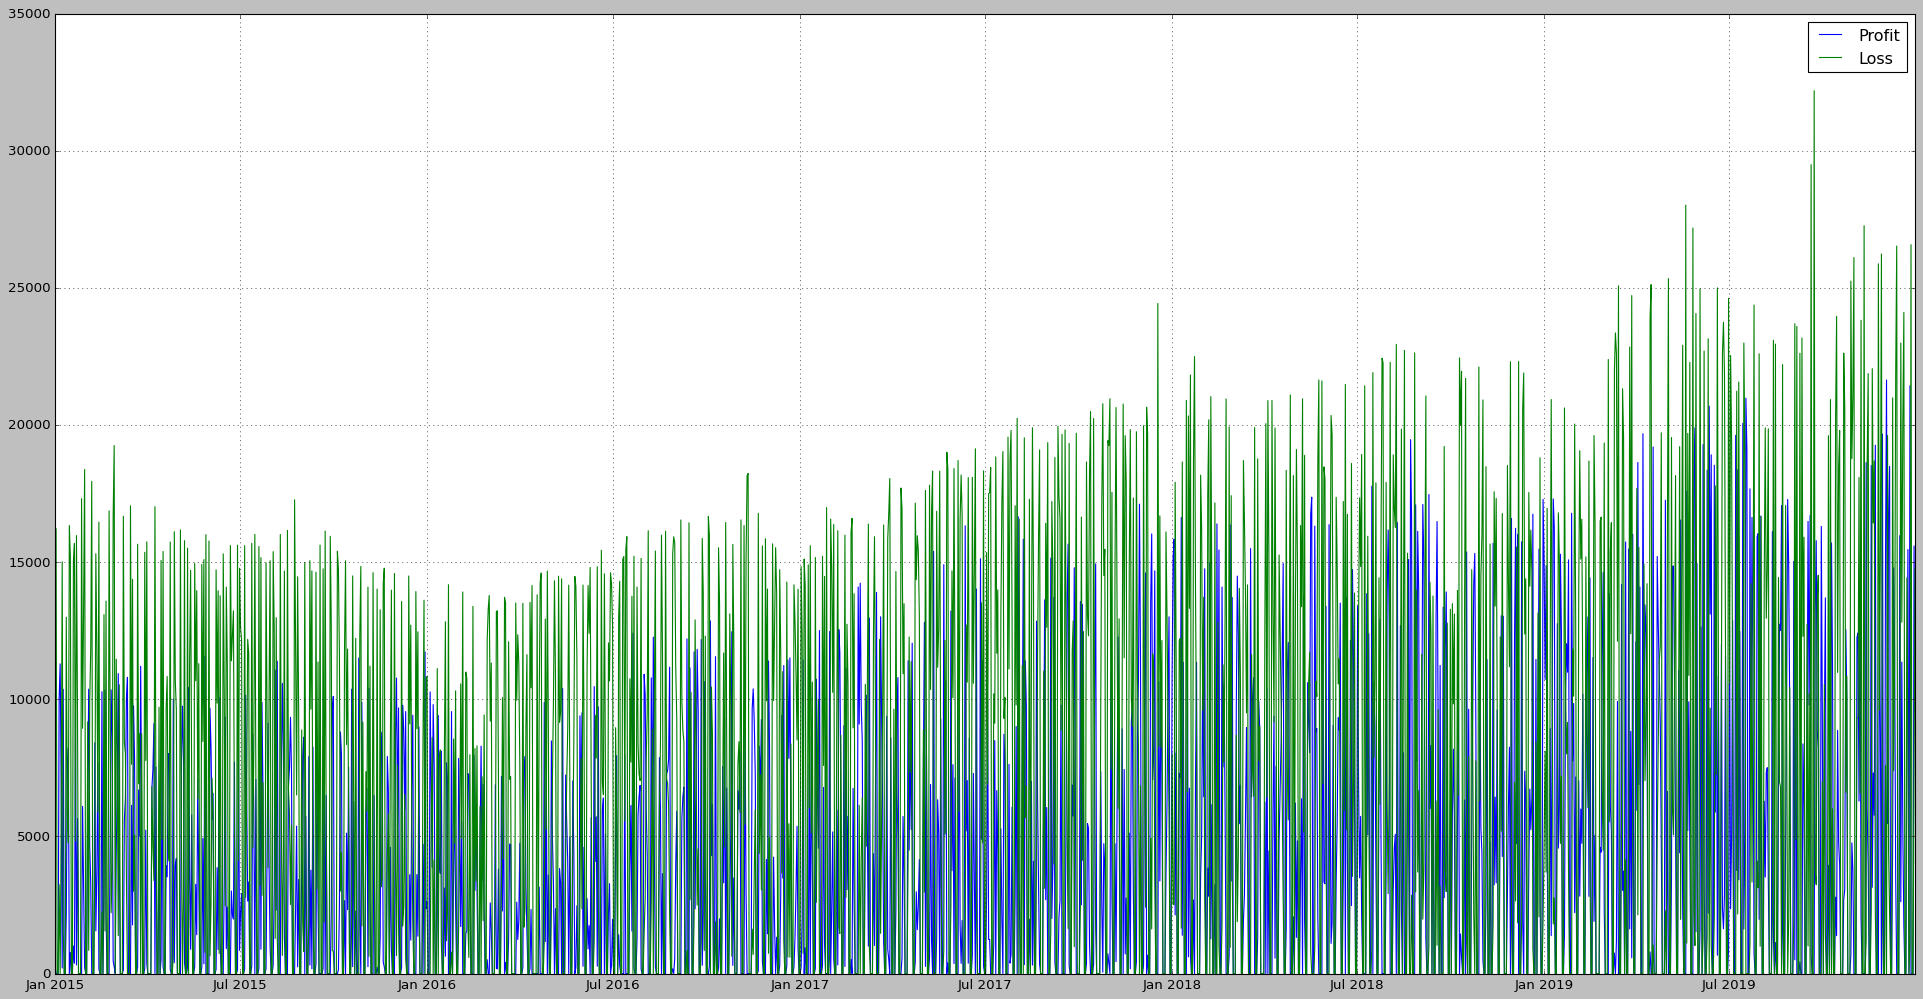

In [ ]:
fin['Profit'].plot(grid=True)
fin['Loss'].plot(grid=True)
plt.legend()
plt.show()

In [ ]:
y = df6.index.year

In [ ]:
fin_y = df6.groupby(y).mean()

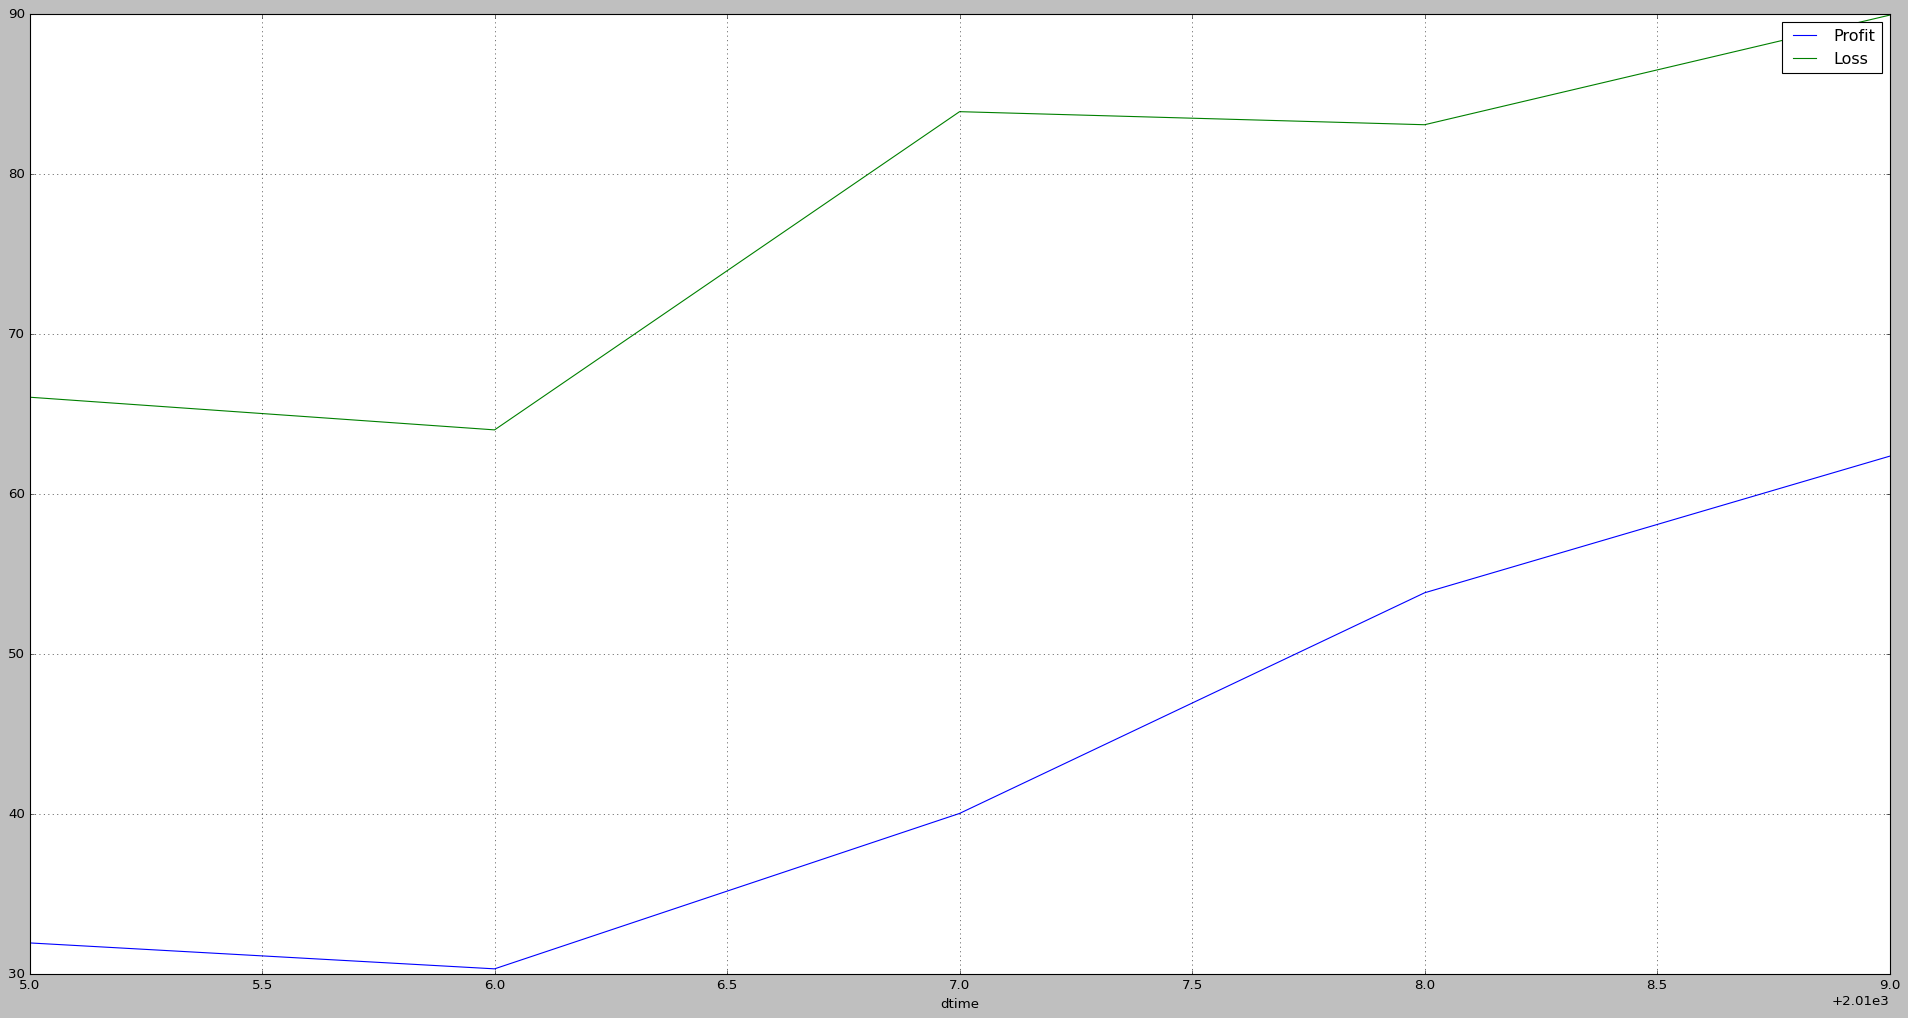

In [ ]:
fin_y['Profit'].plot(grid=True)
fin_y['Loss'].plot(grid=True)
plt.legend()
plt.show()